# Read in and handle SPEAR CR data


The backbone of the database generation used Anthony Yeates' BMR code which used sunpy, and some DRMS commands.  The difference between this SPEAR catalogue and Yeates' BMR catalogue is that the BMR catalogue excluded bipoles that were imbalanced (the exact balance parameter could be varied) in positive and negative flux.  The SPEAR catalogue contains all SHARP regions regardless of the polarity imbalance.  

## Load the necessary python modules

In [22]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import importlib
from matplotlib import dates

## Read in Data 
Define the path for reading in the data
Change the input path for your location
Make sure you download the data as a txt file (because if downloaded as a .doc, problems occur)

In [23]:
##the input path needs to be specified
inputpath = '/Users/norton/Desktop/'
dat = np.loadtxt(inputpath+'SPEAR-CR.txt', skiprows=3, delimiter='\t', dtype={'names':('SHARP', 'NOAA', 'CM TIME', 'DAY', 'CR', 'CRLON', 'Lat', 'Lon', 'Latp', 'Lonp', 'Latn', 'Lonn', 'MTOT', 'MPOS', 'MNEG', 'Area', 'Sep', 'Tilt'), 'formats':('i4', 'i4', 'S23', 'f8', 'i4', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8', 'f8')})
sharp=dat['SHARP']
noaa=dat['NOAA']
time=dat['CM TIME']
day=dat['DAY']
cr=dat['CR']
crlon=dat['CRLON']
lat=dat['Lat']
lon=dat['Lon']
mtot=dat['MTOT']
area=dat['Area']
sep=dat['Sep']
tilt=dat['Tilt']
#note: there are a few quantities 
#like negative and positive flux, negative and 
#positive centroids I don't pull out from the data here



## Plot SHARP region latitude vs time
Using the latitude and day values, plot a type of butterfly diagram

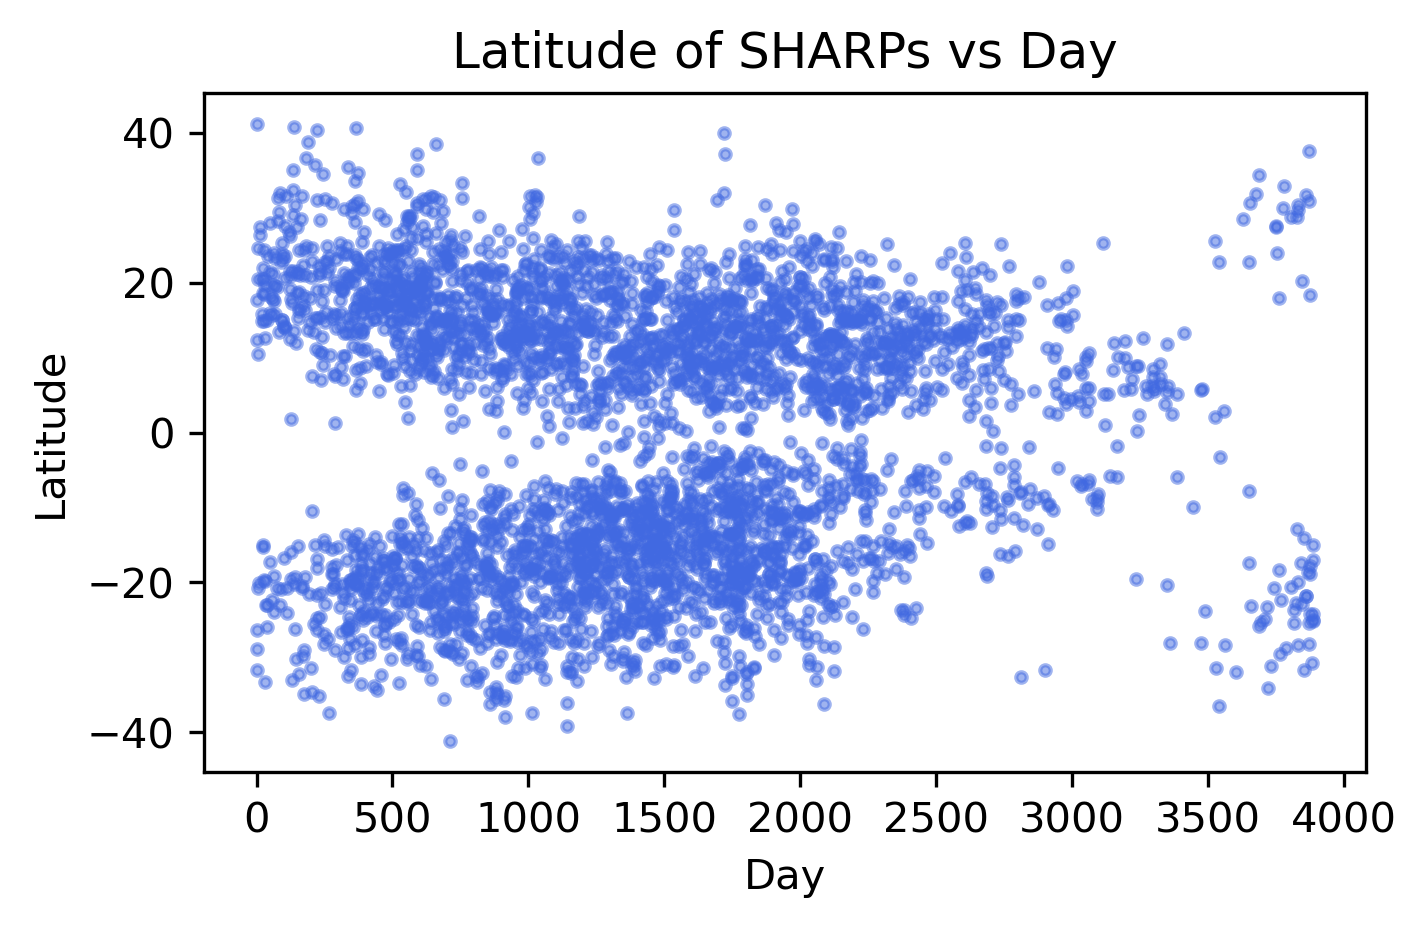

In [44]:
plt.figure(figsize=(5, 3), dpi=300)
area = np.pi*2
plt.scatter(day, lat, s=area,alpha=0.5, c='royalblue')
plt.title('Latitude of SHARPs vs Day')
plt.xlabel('Day')
plt.ylabel('Latitude')
plt.show()


## Plot tilt values as colors overlaid on latitude vs time plot
Using the tilt, latitude and CR values, plot a type of butterfly diagram with tilt values

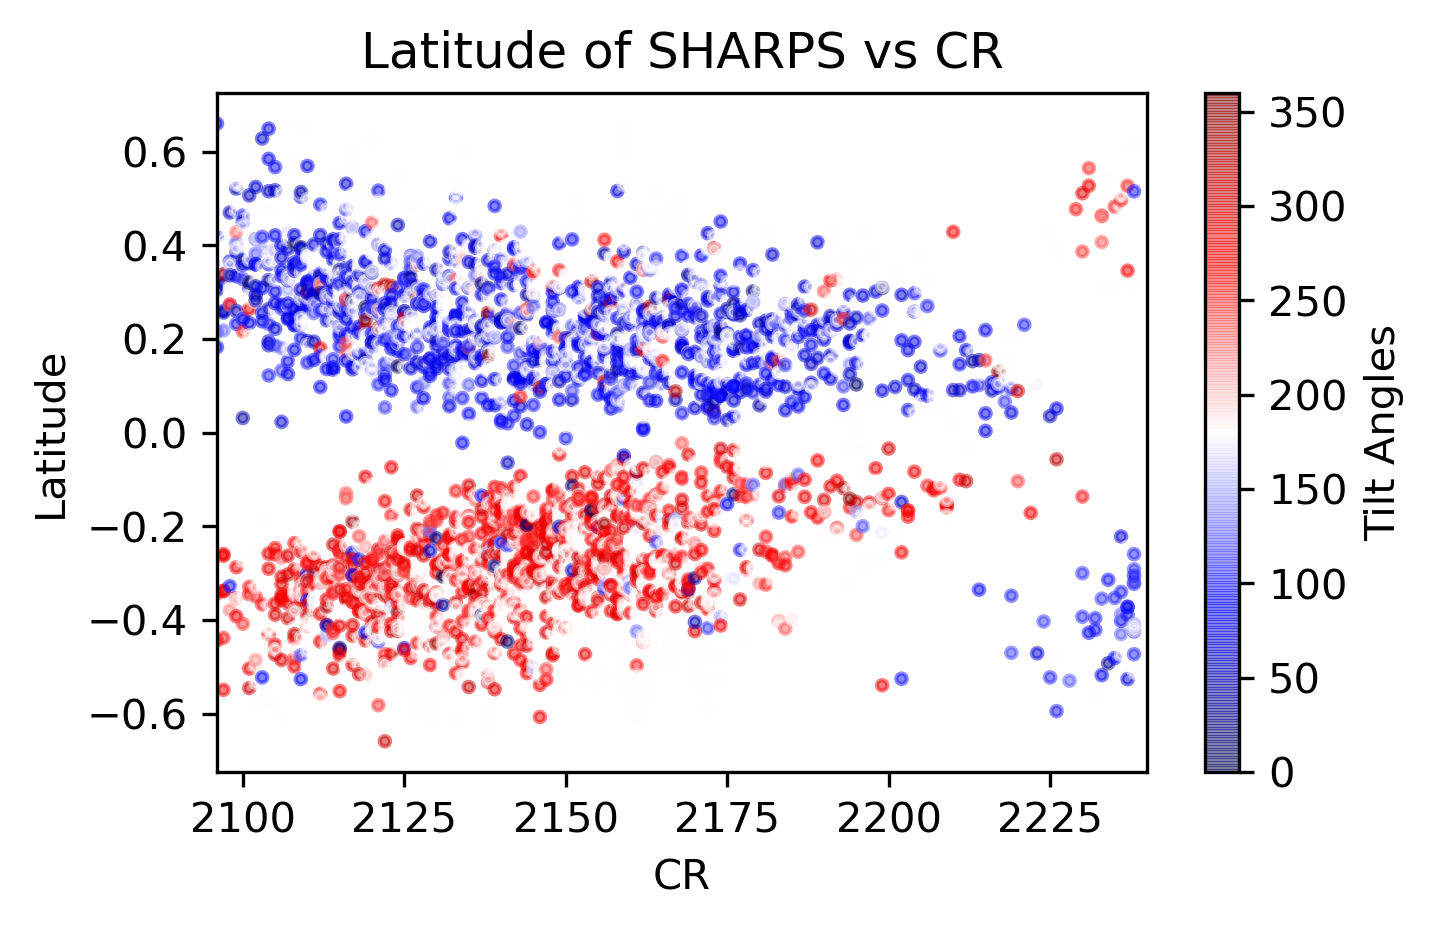

In [27]:
plt.figure(figsize=(5, 3), dpi=300)
#-999 is a placeholder in the catalogue.
#A tilt of -999 is most likely due to the region
#being monopolar so a tilt can not be determined.
#In this plot, I set the -999 to 180 since that value is invisible 
#but you wouldn't want to do that in analysis.
#I usually set an indices valid=np.where(tilt > -999)
#then only use tilt=tilt[valid] or something similar
#to filter out the placeholder values
tilt_col=np.where(tilt > -999, tilt, 180)
colors = tilt_col
area = np.pi*2
plt.scatter(cr, np.sin( lat * np.pi/180), s=area, c=colors, alpha=0.5, cmap='seismic', vmin=0, vmax=360)
plt.title('Latitude of SHARPS vs CR')
plt.xlabel('CR')
plt.ylabel('Latitude')
#plt.ylim(-60,60)
#plt.xlim(2096,2240)
plt.xlim(2096,2240)
cbar = plt.colorbar()
cbar.set_label('Tilt Angles')
plt.show()


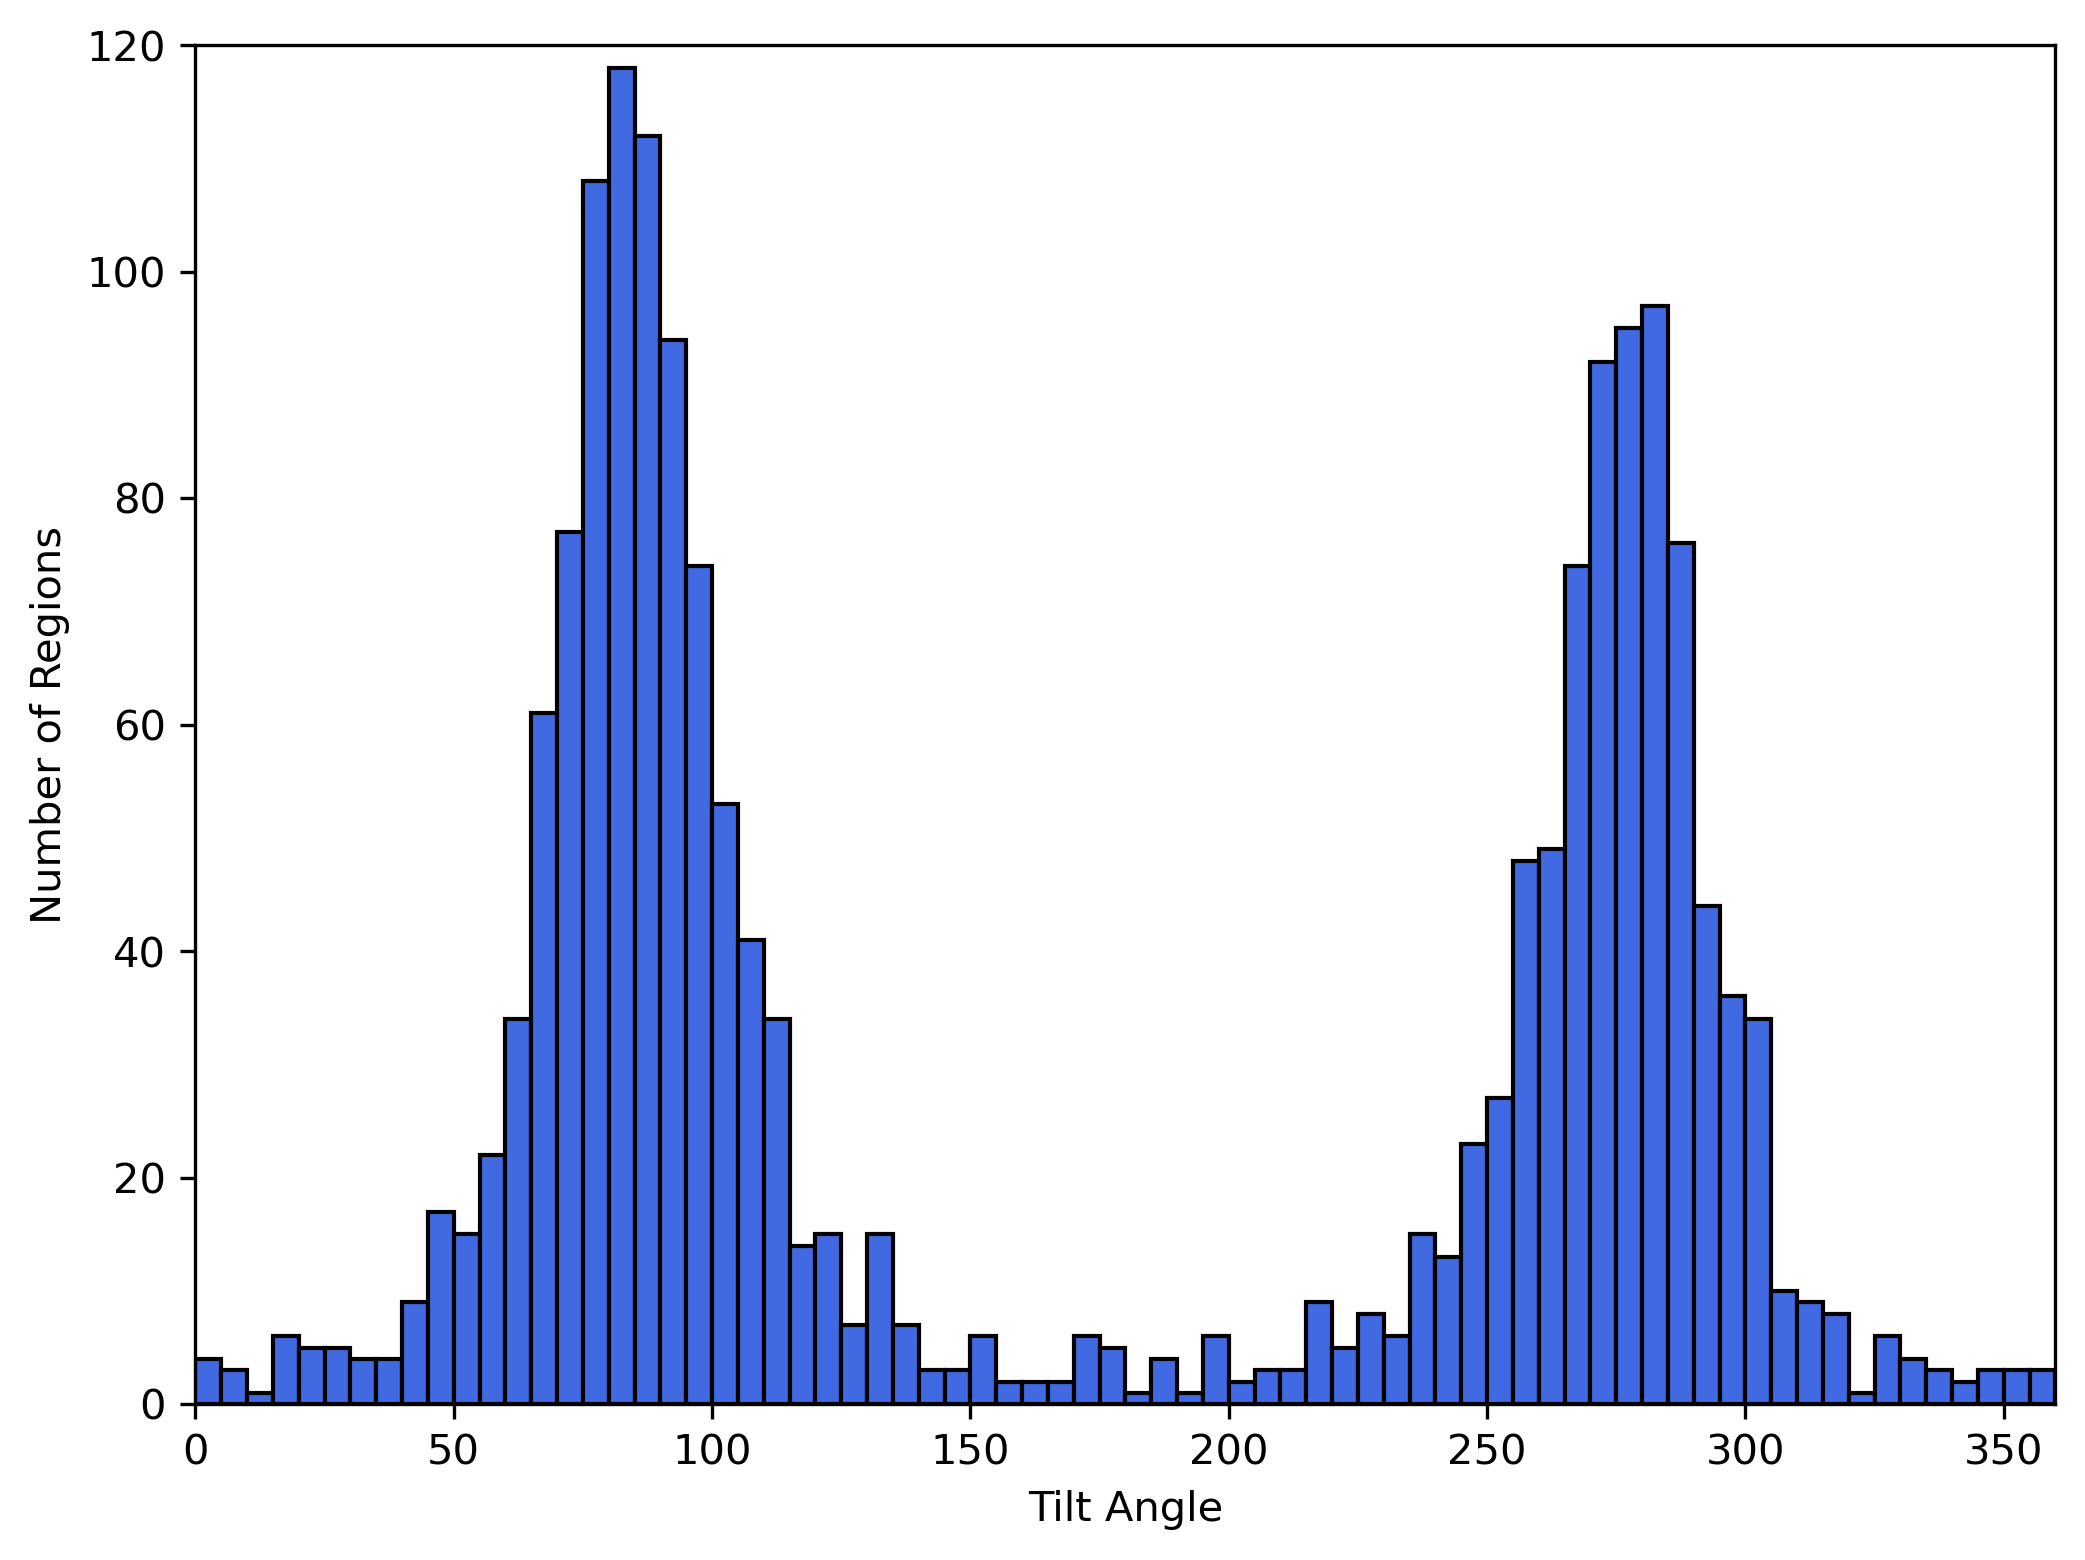

In [29]:
plt.figure(figsize=(8,6), dpi=300)
plt.hist(tilt, color = 'royalblue', edgecolor = 'black', bins = int(360/5), range=(0, 360), label='All Regions')
plt.xlabel("Tilt Angle")
plt.ylabel("Number of Regions")
#plt.title("All Regions")
plt.xlim(0,360)
plt.ylim(0,120)
plt.show() 

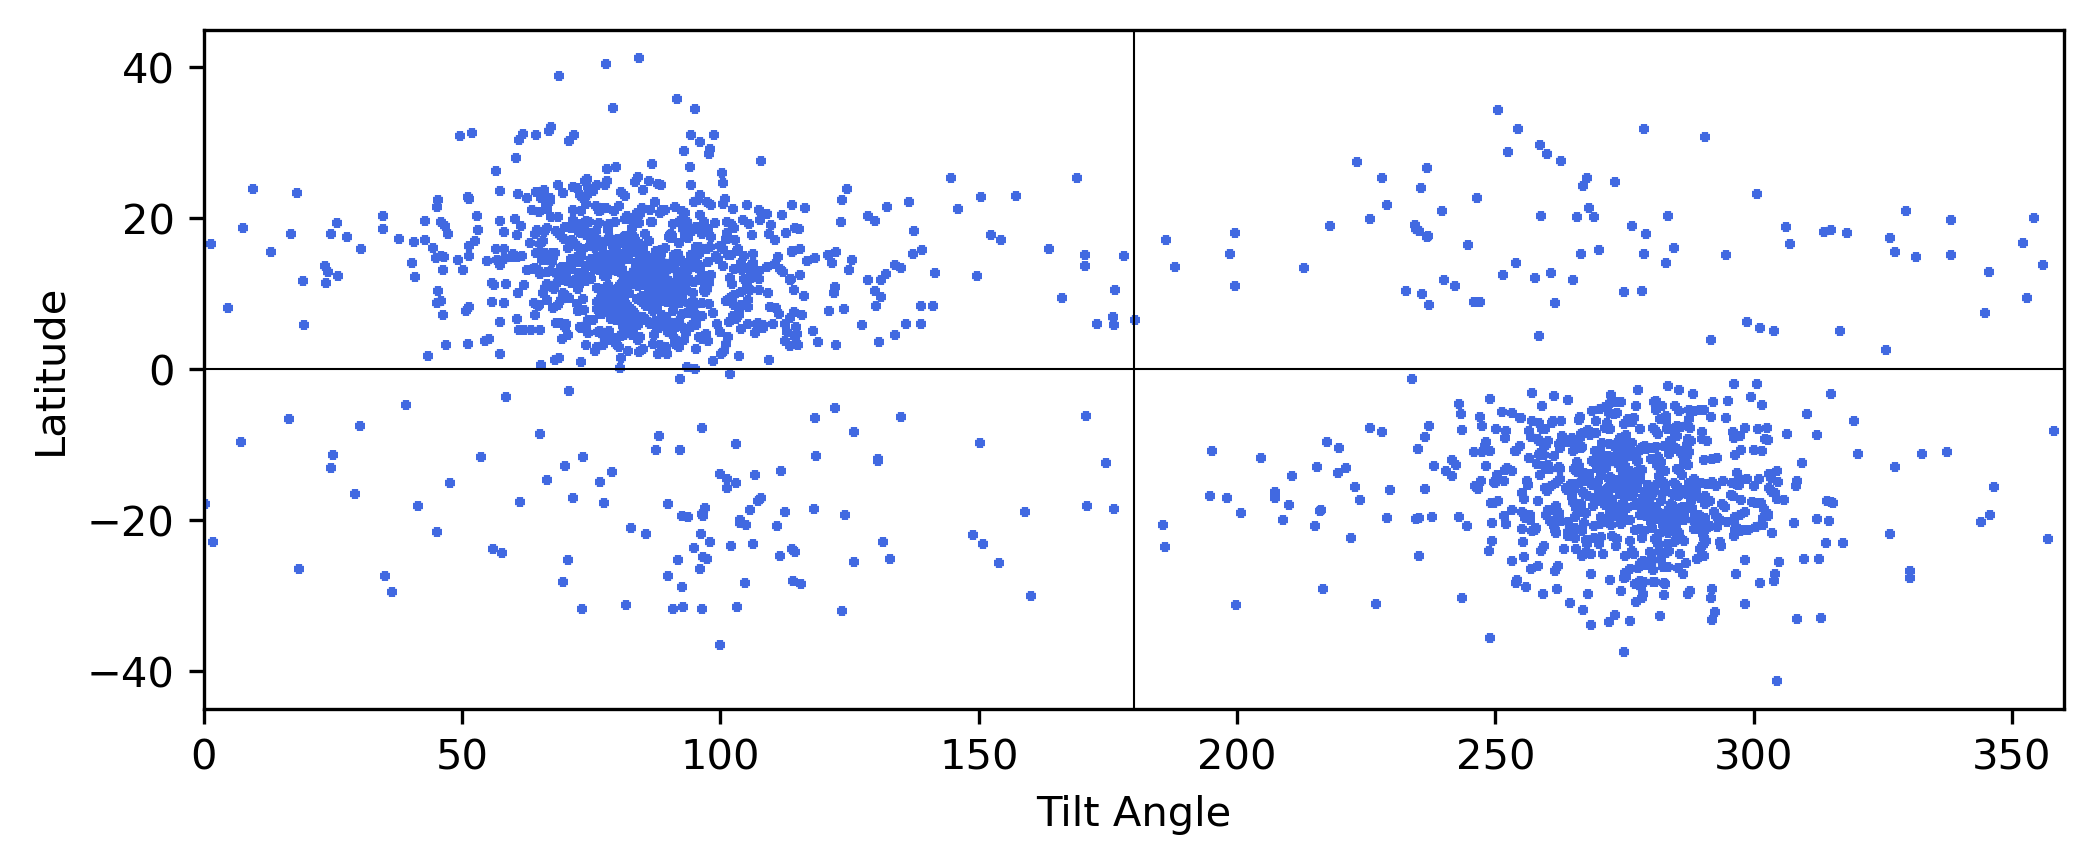

In [33]:
plt.figure(figsize=(8,3), dpi=300)
colors=tilt
plt.scatter(tilt, lat, color='royalblue',s=6, marker='+', vmin=0, vmax=360)
plt.plot([180, 180, 180, 180],[-50, -20, 20, 50],  c='black', linewidth=0.5)
plt.plot( [0, 100, 200, 360], [0, 0, 0, 0], c='black', linewidth=0.5)
plt.xlim(0,360)
plt.ylim(-45,45)
plt.ylabel('Latitude')
plt.xlabel('Tilt Angle')
plt.show()



## Plot tilt as colors overlaid on latitude vs time (day not CR) plot
Using the tilt values, latitude and day values, plot a type of butterfly diagram 

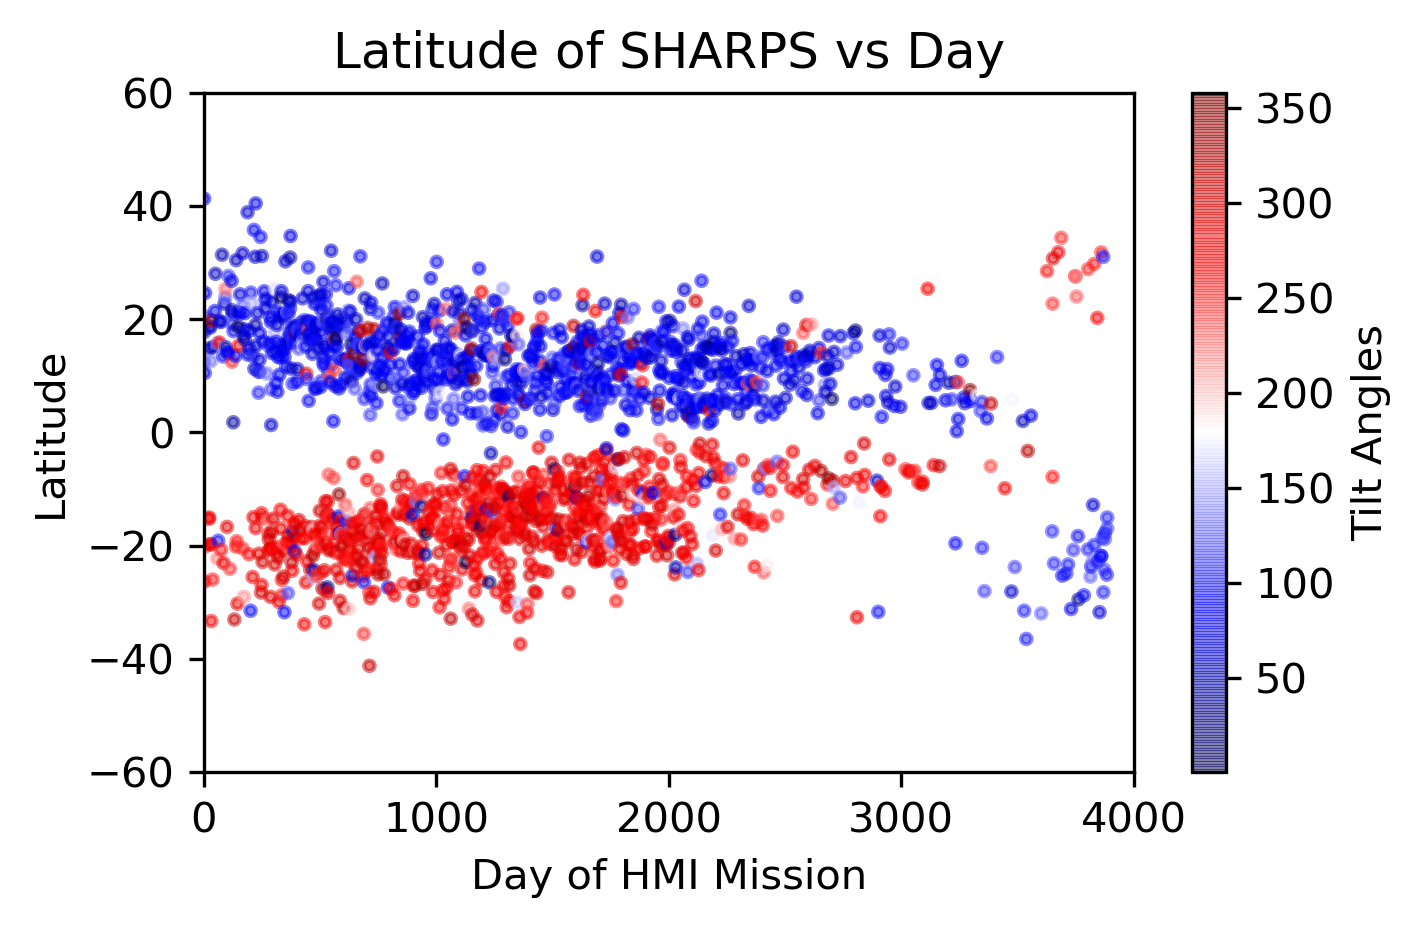

In [41]:
plt.figure(figsize=(5, 3), dpi=300)
valid=np.where(tilt > -999)
colors = tilt[valid]
area = np.pi*2
plt.scatter(day[valid], lat[valid], s=area, c=colors, alpha=0.5, cmap='seismic')
plt.title('Latitude of SHARPS vs Day')
plt.xlabel('Day of HMI Mission')
plt.ylabel('Latitude')
plt.ylim(-60,60)
plt.xlim(0,4000)
cbar = plt.colorbar()
cbar.set_label('Tilt Angles')
plt.show()

## Plot hemispheric flux vs time
Separating the flux by N and S hemisphere using latitude, and using total flux and CR data, plot hemispheric flux vs time

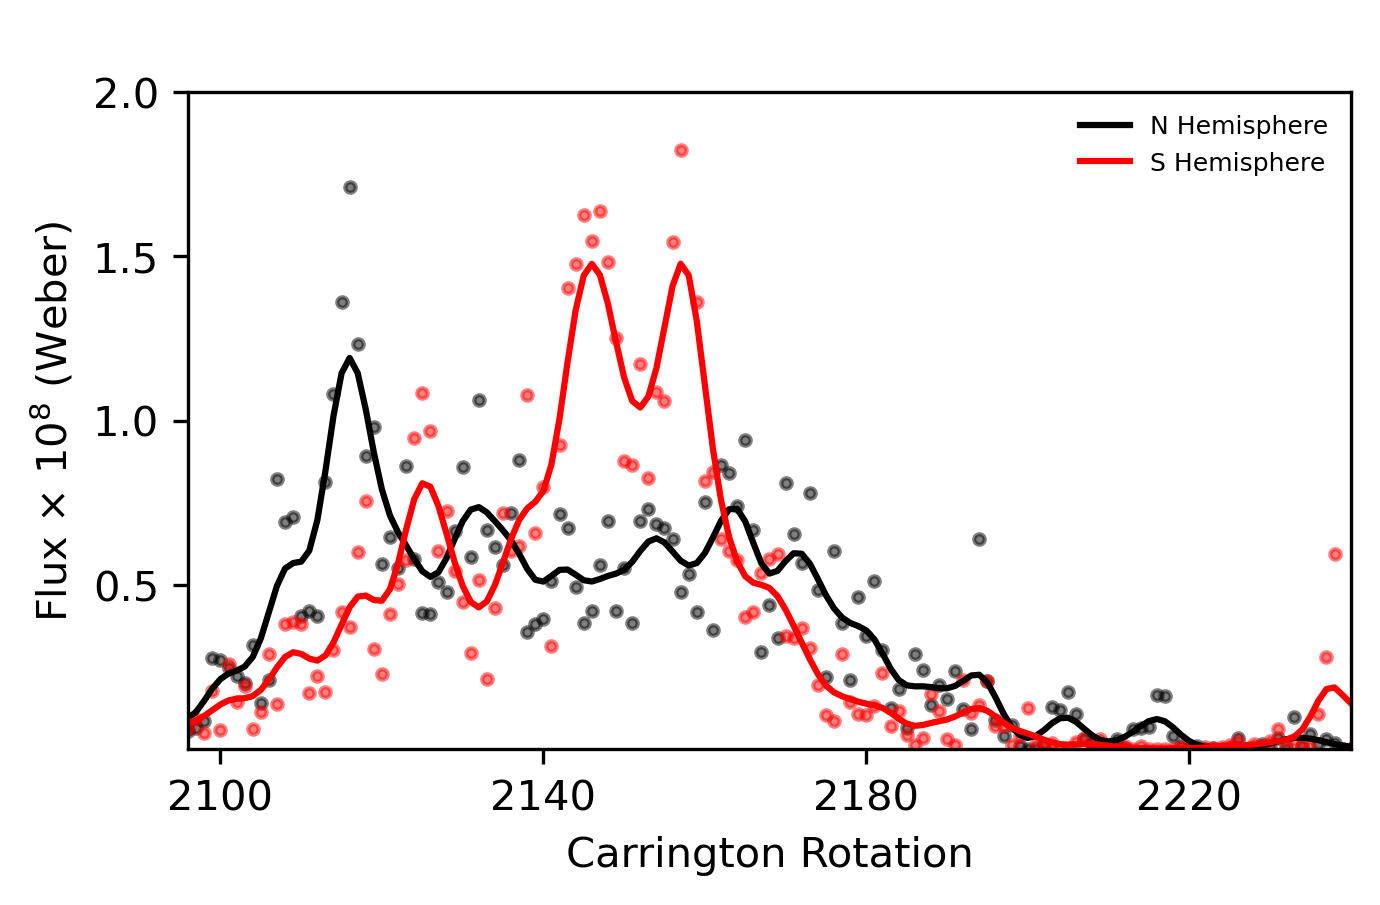

In [43]:
from scipy.ndimage.filters import gaussian_filter1d
plt.figure(figsize=(5, 3), dpi=300)
nflux=np.zeros(145)
sflux=np.zeros(145)
cr_num=np.zeros(145)
for i in range(0,145):
    cr_num[i]=2096+i
    ind=np.where((cr == 2096+i) & (lat >0))
    ind2=np.where((cr == 2096+i) & (lat <0))
    nflux[i]=np.sum(mtot[ind])
    sflux[i]=np.sum(mtot[ind2])   
nflux=nflux/1.e8
sflux=sflux/1.e8
sm_nflux=gaussian_filter1d(nflux, sigma=2)
sm_sflux = gaussian_filter1d(sflux, sigma=2)
area = np.pi*2
plt.scatter(cr_num, nflux, s=area, alpha=0.5, c='black')
plt.plot(cr_num, sm_nflux, c='black', label='N Hemisphere')
plt.scatter(cr_num, sflux, s=area, alpha=0.5, c='red')
plt.plot(cr_num, sm_sflux, c='red', label='S Hemisphere')
plt.title(' ')
plt.gcf().subplots_adjust(bottom=0.15)
plt.xlabel('Carrington Rotation')
plt.ylabel(r'Flux $\times~ 10^8$ (Weber)')
plt.ylim(0,2)
plt.yticks((0.5, 1.0, 1.5, 2.0))
plt.xlim(2096,2240)
plt.xticks((2100, 2140, 2180, 2220))
plt.legend(frameon=False, prop={'size': 6})
plt.show()